# Geant4 detector simulation 

Geant (Geometry and tracking algorithm) is a software development kit to develop high energy physics simulations. 

Things you can do 
* Create geometrical objects 
* Define a list of material interactions 
* Run particles through detector simulations 

In [1]:
#Largely adapted from https://github.com/SimonBiggs/ipython-geant4-linac/blob/master/main.ipynb 
from Geant4 import *
#from IPython.display import Image


**************************************************************
 Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

Visualization Manager instantiating with verbosity "warnings (3)"...


Let us first create a geometry in Geant4. The way it is done is by creating a ``detector`` class. And this class should inherit from the G4VUserDetectorConstruction and an implementation of ``Construct()`` virtual function. 

In the following we do a couple of things. 
* First we create a ``world`` geometry. This is the ``mother`` of all the gemoetrical objects. All objects are living within this mother object
* We create a couple of other geometries which are ``daughters`` of the mother geomery 

In [2]:
from detector import MyDetector

So we have created a detector geometry. Lets go create an instace of this

In [3]:
det = MyDetector()
gRunManager.SetUserInitialization(det)

In [4]:
physics_list = FTFP_BERT()
gRunManager.SetUserInitialization(physics_list)

<<< Geant4 Physics List simulation engine: FTFP_BERT



### Particle gun 
This is a geant4 way of initializing a process. The particle gun could be placed at constant coordinate to simulate beam. Or the coordinates could be randomized to create for instance cosmic rays 

In [5]:
from PrimaryGeneratorAction import GeneratorAction
pmga = GeneratorAction()
gRunManager.SetUserAction(pmga)

In [6]:
gRunManager.Initialize()


 FTFP_BERT : new threshold between BERT and FTFP is over the interval 
 for pions :   3 to 6 GeV
 for kaons :   3 to 6 GeV
 for proton :  3 to 6 GeV
 for neutron : 3 to 6 GeV

### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0


In [7]:
%%file macros/dawn.mac

/vis/open DAWNFILE

/vis/scene/create
/vis/scene/add/volume

/vis/scene/add/trajectories smooth
/vis/modeling/trajectories/create/drawByParticleID PID
/vis/modeling/trajectories/PID/set mu+ red
/vis/modeling/trajectories/PID/set mu- yellow
/vis/modeling/trajectories/PID/set e- green
#/vis/modeling/trajectories/create/drawByCharge
#/vis/modeling/trajectories/drawByCharge-0/default/setDrawStepPts true
#/vis/modeling/trajectories/drawByCharge-0/default/setStepPtsSize 2

/vis/scene/endOfEventAction accumulate 1000

/vis/scene/add/hits

/vis/sceneHandler/attach
#/vis/scene/add/axes 0. 0. 0. 10. cm

/vis/viewer/set/targetPoint 0.0 0.0 300.0 mm
/vis/viewer/set/viewpointThetaPhi 50 10

/vis/viewer/zoom 1

Overwriting macros/dawn.mac


In [8]:
gUImanager.ExecuteMacroFile('macros/dawn.mac')

/tracking/storeTrajectory 2


In [9]:
gRunManager.BeamOn(50)
!mv g4_0001.prim images/world.prim


phot:  for gamma SubType=12 BuildTable=0
      LambdaPrime table from 200 keV to 100 TeV in 61 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
 LivermorePhElectric : Emin=    0 eV  Emax=  100 TeV  SauterGavrila Fluo

compt:  for gamma SubType=13 BuildTable=1
      Lambda table from 100 eV  to 1 MeV, 7 bins/decade, spline: 1
      LambdaPrime table from 1 MeV to 100 TeV in 56 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       Klein-Nishina : Emin=    0 eV  Emax=  100 TeV

conv:  for gamma SubType=14 BuildTable=1
      Lambda table from 1.022 MeV to 100 TeV, 18 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
     BetheHeitlerLPM : Emin=    0 eV  Emax=  100 TeV  ModifiedTsai

Rayl:  for gamma SubType=11 BuildTable=1
      Lambda table from 100 eV  to 100 keV, 7 bins/decade, spline: 0
      LambdaPrime table from 100 keV to 100 TeV in 63 bins 
      ===== EM models for the G4Regi

Time limit for long lived isomeres (ns)             ... truncatedOutput file: g4_0001.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 100
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0001.prim  is generated.
dawn g4_0001.prim


In [10]:
!dawn -d images/world.prim


***************************************
          Fukui  Renderer         
              DAWN                
 (Drawer for Academic WritiNgs)   
 ver 3.91a (Dev. indep. Mode)
          January 15, 2019
***************************************


***** g4.prim viewer mode (default)
***** ("dawn -h" for help)

***** PostScript file "images/world.eps" is created.
***** The showpage command is added.
sh: 1: gv: not found


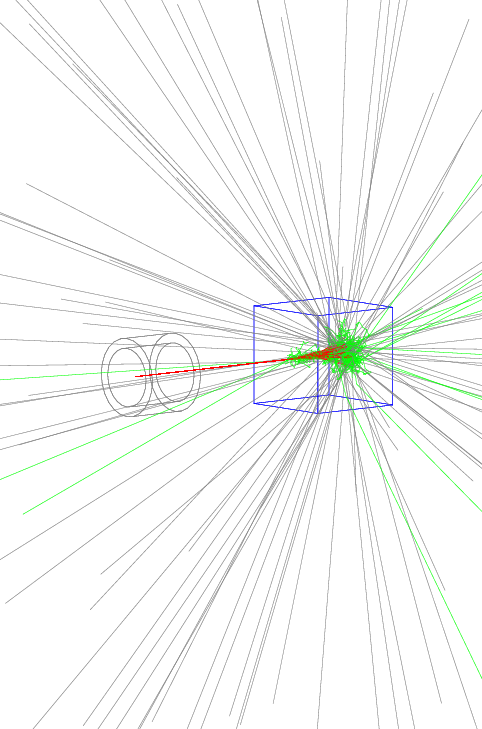

In [11]:
!convert images/world.eps images/world.png
from IPython.display import Image
Image("images/world.png")

In [12]:
import ROOT

Welcome to JupyROOT 6.18/04


In [13]:
%jsroot on

In [36]:
h = ROOT.TH1F("gaus","testing",100,-10,10)
h.FillRandom("gaus",1000)
c1 = ROOT.TCanvas()
h.Draw()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: gaus (Potential memory leak).
